# 数据分类

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pieces = []
for year in range(1880, 2011):
    path = f"datasets/babynames/yob{year}.txt"
    frame = pd.read_csv(path, names=["name", "sex", "births"])
 
    # 为年份添加一列
    frame["year"] = year
    pieces.append(frame)

# 将所有内容连接到单个DataFrame
names = pd.concat(pieces, ignore_index=True)

# 按性别分组生成两个DataFrame并重新排序索引
names_male = names[names['sex'] == 'M'].reset_index(drop=True)
names_female = names[names['sex'] == 'F'].reset_index(drop=True)

# 历年top姓名下载

In [3]:
import pandas as pd

# 假设 names_male 和 names_female 是已经存在的 DataFrame 分别包含 'name', 'year', 'births' 列

# 定义一个函数来获取历年最受欢迎的名字并保存数据
def get_top_names():
    while True:
        gender = input("您想查询男性还是女性的名字？(请输入 'M' 或 'F'): ").upper()
        if gender == 'M':
            df = names_male
            break
        elif gender == 'F':
            df = names_female
            break
        else:
            print("请输入有效的性别。")
            continue
    
    while True:
        try:
            # 提示用户输入要获取的历年最受欢迎的名字数量
            top_rank = int(input("请输入要获取的历年最受欢迎的名字数量："))
            if top_rank > 0:
                break
            else:
                print("请输入一个大于零的数字。")
        except ValueError:
            print("请输入一个有效的数字。")

    # 计算每年所有名字的排名
    df['rank'] = df.groupby('year')['births'].rank(ascending=False)

    # 获取历年排名前top_rank的名字
    top_names = df[df['rank'] <= top_rank]

    # 将排名前top_rank的名字按年份和排名保存到文件
    top_names.to_csv(f'top_{top_rank}_names_{gender}.csv', index=False)

    # 提示并询问用户是否要继续查询
    while True:
        continue_query = input("数据已保存。是否要继续查询？(Y/N): ").upper()
        if continue_query == 'Y':
            get_top_names()
            break
        elif continue_query == 'N':
            print("谢谢使用！")
            break
        else:
            print("请回答“Y”或“N”。")

# 获取用户输入的历年最受欢迎的名字数量，并保存到文件
get_top_names()

您想查询男性还是女性的名字？(请输入 'M' 或 'F'): M
请输入要获取的历年最受欢迎的名字数量：5
数据已保存。是否要继续查询？(Y/N): Y
您想查询男性还是女性的名字？(请输入 'M' 或 'F'): F
请输入要获取的历年最受欢迎的名字数量：3
数据已保存。是否要继续查询？(Y/N): N
谢谢使用！


# 姓名历年排名查询

请输入要查询名字的性别 (男/女): M
请输入要查询的名字：John


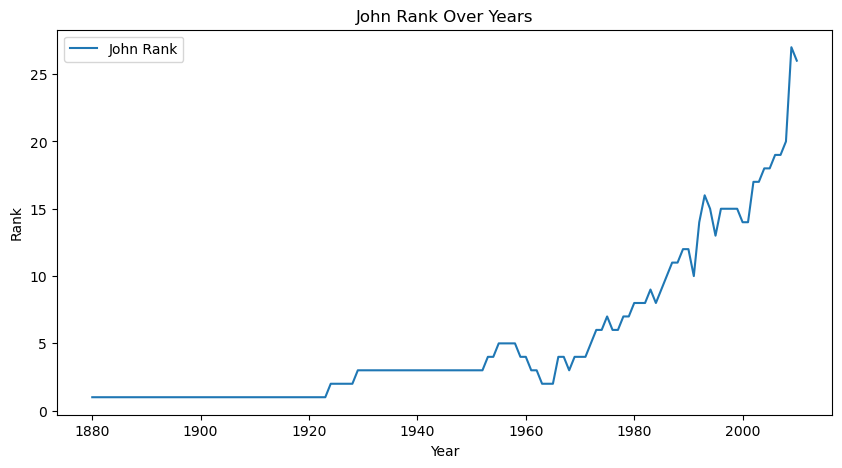

是否要查询另一个名字？(yes/no): n


In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# 假设 names_male 和 names_female 是已经存在的 DataFrame 包含 'name', 'year', 'births' 列

# 定义一个函数来查询名字的排名情况
def plot_name_rank(name, df):
    # 选择特定名字的数据
    name_data = df[df['name'] == name]

    # 如果名字不存在于DataFrame中，则提供反馈并重新要求输入
    if name_data.empty:
        print(f"抱歉，名字 '{name}' 在数据集中不存在，请重新输入。")
        return

    # 计算该名字在每年的命名人数
    name_counts = name_data.groupby('year')['births'].sum()

    # 计算每年所有名字的排名
    df['rank'] = df.groupby('year')['births'].rank(ascending=False)

    # 获取特定名字的排名
    name_data = df[df['name'] == name]  # 重新获取名字的数据，包括新的'rank'列
    name_rank = name_data.groupby('year')['rank'].mean()  # 使用mean是因为可能有多个同名人在同一年

    # 绘制折线图
    plt.figure(figsize=(10, 5))
    plt.plot(name_rank.index, name_rank.values, label=f'{name} Rank')
    plt.xlabel('Year')
    plt.ylabel('Rank')
    plt.title(f'{name} Rank Over Years')
    plt.legend()

    plt.show()

# 根据用户输入的性别选择相应的 DataFrame
while True:
    gender = input("请输入要查询名字的性别 (男/女): ")
    if gender.lower() == 'f':
        selected_df = names_female
    elif gender.lower() == 'm':
        selected_df = names_male
    else:
        print("请输入有效的性别 (F/f 或 M/m)。")
        continue
    
    name_to_search = input("请输入要查询的名字：")
    plot_name_rank(name_to_search, selected_df)
    
    answer = input("是否要查询另一个名字？(yes/no): ")
    if answer.lower() != 'yes':
        break

请输入要查询名字的性别 (男/女): m
请输入要查询的名字：John


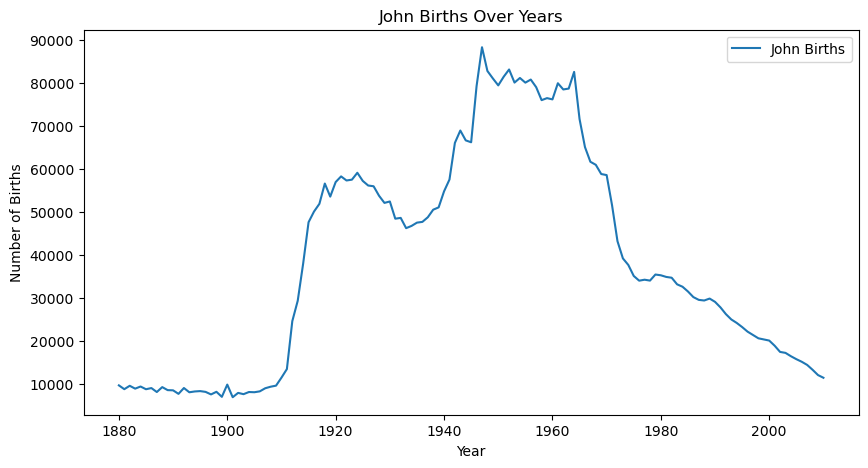

是否要查询另一个名字？(yes/no): n


In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# 假设 names_male 和 names_female 是已经存在的 DataFrame 包含 'name', 'year', 'births' 列

# 定义一个函数来查询名字的出生人数情况
def plot_name_births(name, df):
    # 选择特定名字的数据
    name_data = df[df['name'] == name]

    # 如果名字不存在于DataFrame中，则提供反馈并重新要求输入
    if name_data.empty:
        print(f"抱歉，名字 '{name}' 在数据集中不存在，请重新输入。")
        return

    # 计算该名字在每年的命名人数
    name_counts = name_data.groupby('year')['births'].sum()

    # 绘制出生人数随时间变化的折线图
    plt.figure(figsize=(10, 5))
    plt.plot(name_counts.index, name_counts.values, label=f'{name} Births')
    plt.xlabel('Year')
    plt.ylabel('Number of Births')
    plt.title(f'{name} Births Over Years')
    plt.legend()
    plt.show()

# 根据用户输入的性别选择相应的 DataFrame
while True:
    gender = input("请输入要查询名字的性别 (男/女): ")
    if gender.lower() == 'f':
        selected_df = names_female
    elif gender.lower() == 'm':
        selected_df = names_male
    else:
        print("请输入有效的性别 (F/f 或 M/m)。")
        continue
    
    name_to_search = input("请输入要查询的名字：")
    plot_name_births(name_to_search, selected_df)
    
    answer = input("是否要查询另一个名字？(yes/no): ")
    if answer.lower() != 'yes':
        break